In [0]:
from google.colab import drive
drive.mount('/content/drive')

# add characters to text labels

In [0]:
import random
import numpy as np

# [0-100] [,] [-] [!]
# чим більше ratio тим менше відповідних символів
def add_random_symbols(in_file_path, out_file_path,
               digit_range=(0, 100),
               digit_ratio=10,
               comma_ratio=10,
               hyphen_ratio=30,
               exclamation_mark_ratio=30
              ):
  with open(in_file_path) as f1:
    text = f1.readlines()
  
  dig_text = []
  for line in text:
    ln = len(line)
    if ln>10: # номер сампла
      dig_num, com_num, hyp_num, ex_num = int(ln/digit_ratio),int(ln/comma_ratio),int(ln/hyphen_ratio),int(ln/exclamation_mark_ratio)
      digits = random.choices(list(map(str, range(digit_range[0], digit_range[1]))), k=dig_num)
      digit_indexes = random.choices(range(0,ln), k=dig_num)
      comma_indexes = random.choices(range(0,ln), k=com_num)
      hyphen_indexes = random.choices(range(0,ln), k=hyp_num)
      exclamation_mark_indexes = random.choices(range(0,ln), k=ex_num)
      
      line = add_symbols(digits, digit_indexes, line)
      line = add_symbols(','*com_num, comma_indexes, line)
      line = add_symbols('-'*hyp_num, hyphen_indexes, line)
      line = add_symbols('!'*ex_num, exclamation_mark_indexes, line)
    dig_text.append(line)
  
  with open(out_file_path, 'wt') as f1:
    f1.writelines(dig_text)


def add_symbols(symbols, indexes, line):
  for symbol,index in zip(symbols,indexes):
    line = line[:index] + symbol + line[index:]
  return line


def delete_whitelines(in_file_path, out_file_path):
  with open(in_file_path) as f1:
    lines = f1.readlines()
  new_lines=[]
  for line in lines:
    if line != '\n':
      new_lines.append(line)
  with open(out_file_path, 'wt') as f1:
    f1.writelines(new_lines)

    
# file_path - шлях до txt файла з рядками даних
# save_path - шлях для збереження файла пронумерованих рядків даних
def add_numeration(file_path, save_path):
  with open(file_path, 'rt') as f1:
    lines = f1.readlines()
  numerated_lines = []
  for line, i in zip(lines, range(1, len(lines)+1)):
    numerated_lines.append(str(i)+'\n')
    numerated_lines.append(line)
  with open(save_path, 'wt') as f1:
    f1.writelines(numerated_lines)
    
    
def convert_labels_to_images(file_path, save_dir_path):
  with open(file_path, 'rt') as f1:
    lines = f1.readlines()
    # ???

    
# чим більше ratio тим менше символів на стрічку
def add_chars_from_arr(char_arr, in_file_path, out_file_path, chars_ratio=10):
  with open(in_file_path) as f1:
    text = f1.readlines()
  new_text = []
  for line in text:
    ln = len(line)
    if ln>10: # номер сампла
      char_num = int(ln/chars_ratio)
      chars = np.random.choice(char_arr, char_num)
      char_indexes = np.random.choice(ln, char_num)
      line = add_symbols(chars, char_indexes, line)
    new_text.append(line)
  with open(out_file_path, 'wt') as f1:
    f1.writelines(new_text)



> **add digits and chars to train**



In [9]:
import string
in_file_path = r'/content/drive/My Drive/Colab Notebooks/course_project/data_crnn/train/y/roboto_mono_80.txt'
in_file_path = r'/content/drive/My Drive/Colab Notebooks/course_project/data_crnn/train/y_new/roboto_mono_80_new11.txt'
out_file_path = r'/content/drive/My Drive/Colab Notebooks/course_project/data_crnn/train/y_new/roboto_mono_80_new12.txt'

#in_file_path = r'/content/drive/My Drive/Colab Notebooks/course_project/data_crnn/test/y_new/roboto_mono_20_new3.txt'
#out_file_path = r'/content/drive/My Drive/Colab Notebooks/course_project/data_crnn/test/y_new/roboto_mono_20_new3.txt'
# q65 w900 y900 u1200 p900 f700 g1000 h1500 j69 k200 z0 x152 c1150 v600 b400 m1300.
# uppercase

char_arr0 = list('vb')
char_arr1 = list('qwyufghjkzxcvbm')
char_arr2 = list(string.ascii_uppercase)
char_arr3 = list(string.digits)
print(char_arr2)
add_chars_from_arr(char_arr2, in_file_path, out_file_path, chars_ratio=5)

['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y', 'Z']






> **add numeration**





In [0]:
file_path = r'/content/drive/My Drive/Colab Notebooks/course_project/data_crnn/train/y/helvetica_neue_50 (1).txt'
save_path = r'/content/drive/My Drive/Colab Notebooks/course_project/data_crnn/train/y/helvetica_neue1_50.txt'

add_numeration(file_path, save_path)

50
100




> **add random symbols**



In [0]:
in_file_path = r"/content/drive/My Drive/Colab Notebooks/course_project/test_data/test_y/test_y.txt"
out_file_path = r"/content/drive/My Drive/Colab Notebooks/course_project/test_data/test_y/test_y_digit.txt"

digit_ratio, comma_ratio, hyphen_ratio, exclamation_mark_ratio = 40,100000,300000,300000
digit_range = (0,20)

add_random_symbols(in_f_p2,
                   out_f_p2,
                   digit_range,
                   digit_ratio,
                  comma_ratio,
                  hyphen_ratio,
                  exclamation_mark_ratio)



> **delete whitelines**



In [0]:
in_file_path = r"/content/drive/My Drive/Colab Notebooks/course_project/test_data/test_y/test_y_digit.txt"
out_file_path = r"/content/drive/My Drive/Colab Notebooks/course_project/test_data/test_y/test_y_digit_no_whitespaces.txt"

in_file_path1 = r'/content/drive/My Drive/Colab Notebooks/course_project/data_crnn/test/y_new/roboto_mono_20_new3.txt'
out_file_path1 = r'/content/drive/My Drive/Colab Notebooks/course_project/data_crnn/test/y_new/roboto_mono_20_new4.txt'

delete_whitelines(in_file_path1, out_file_path1)





# text to image



In [0]:
import text_to_image
import os
import cv2
import matplotlib.pyplot as plt
from copy import deepcopy
import numpy as np

In [0]:

x_path = r'/content/drive/My Drive/Colab Notebooks/course_project/data_crnn/train/x'
img_name = 'image.jpg'

image = np.zeros([68,256,3], np.uint8)
image.fill(255)

fonts = [0, ] + list(range(2,6))

FONT_HERSHEY_SIMPLEX = 0,
FONT_HERSHEY_PLAIN = 1,
FONT_HERSHEY_DUPLEX = 2,
FONT_HERSHEY_COMPLEX = 3,
FONT_HERSHEY_TRIPLEX = 4,
FONT_HERSHEY_COMPLEX_SMALL = 5,
FONT_HERSHEY_SCRIPT_SIMPLEX = 6,
FONT_HERSHEY_SCRIPT_COMPLEX = 7,
FONT_ITALIC = 16


for font in fonts:
  img1 = cv2.putText(deepcopy(image),'OpenCV', (0,50), font, 1, (0,0,0), 1, cv2.LINE_AA) # x0, y0 ~ left up
  h,w = img1.shape[:-1]
  img1 = cv2.resize(img1, (int(w*34/h), 34), interpolation = cv2.INTER_CUBIC)
  plt.imshow(img1)
  plt.show()

cv2.imwrite(os.path.join(x_path, img_name), img1)

#encoded_image_path = text_to_image.encode_file("input_text_file.txt", "output_image.png")
#decoded_text = text_to_image.decode("encoded_image.png")
#decoded_file_path = text_to_image.decode_to_file("encoded_image.png", "output_text_file.txt")



# lot of fonts to image



## font_dict

In [0]:
font_paths = {
    'roboto_mono': r'/content/drive/My Drive/Colab Notebooks/course_project/data_crnn/fonts/roboto-mono/RobotoMono-Regular.ttf',
    'arial': r'/content/drive/My Drive/Colab Notebooks/course_project/data_crnn/fonts/Arial/ArialRegular/ArialRegular.ttf',
    'armino': r'/content/drive/My Drive/Colab Notebooks/course_project/data_crnn/fonts/arimo/Arimo-Regular.ttf',
    'helvetica': r'/content/drive/My Drive/Colab Notebooks/course_project/data_crnn/fonts/helvetica/HelveticaRegular/HelveticaRegular.ttf',
    'open_sans': r'/content/drive/My Drive/Colab Notebooks/course_project/data_crnn/fonts/open-sans/OpenSans-Regular.ttf',
    'roboto2014': r'/content/drive/My Drive/Colab Notebooks/course_project/data_crnn/fonts/roboto-2014/Roboto-Regular.ttf',
    'times_new_roman': r'/content/drive/My Drive/Colab Notebooks/course_project/data_crnn/fonts/times-new-roman/times-new-roman.ttf',
    'calibri': r'/content/drive/My Drive/Colab Notebooks/course_project/data_crnn/fonts/calibri font sv/Calibri Regular/Calibri Regular.ttf',
    'courier': r'/content/drive/My Drive/Colab Notebooks/course_project/data_crnn/fonts/COURIER/COURIER.TTF',
    'lato': r'/content/drive/My Drive/Colab Notebooks/course_project/data_crnn/fonts/Lato2OFL/Lato2OFL/Lato-Regular.ttf',
    'shadows_into_light': r'/content/drive/My Drive/Colab Notebooks/course_project/data_crnn/fonts/Shadows-into-light_Typeface_1813_(Fontmirror)/Shadows Into Light 400.ttf',
    'abel': r'/content/drive/My Drive/Colab Notebooks/course_project/data_crnn/fonts/abel/abel-regular.ttf',
    'abril_fatface': r'/content/drive/My Drive/Colab Notebooks/course_project/data_crnn/fonts/abril-fatface/AbrilFatface-Regular.otf',
    'acme': r'/content/drive/My Drive/Colab Notebooks/course_project/data_crnn/fonts/acme/Acme-Regular.ttf',
    'amatic': r'/content/drive/My Drive/Colab Notebooks/course_project/data_crnn/fonts/amatic/Amatic-Bold.ttf',
    'anton': r'/content/drive/My Drive/Colab Notebooks/course_project/data_crnn/fonts/anton/Anton.ttf',
    'archivo': r'/content/drive/My Drive/Colab Notebooks/course_project/data_crnn/fonts/archivo/Archivo-Regular.ttf',
    'arimo': r'/content/drive/My Drive/Colab Notebooks/course_project/data_crnn/fonts/arimo/Arimo-Regular.ttf',
    'asap': r'/content/drive/My Drive/Colab Notebooks/course_project/data_crnn/fonts/asap_regular/asap.regular.ttf',
    'assistant': r'/content/drive/My Drive/Colab Notebooks/course_project/data_crnn/fonts/assistant/Assistant-Regular.otf',
    'barlow': r'/content/drive/My Drive/Colab Notebooks/course_project/data_crnn/fonts/barlow_regular/barlow.regular.ttf',
    'bitter': r'/content/drive/My Drive/Colab Notebooks/course_project/data_crnn/fonts/bitter/Bitter-Regular.ttf',
    'bree_serif': r'/content/drive/My Drive/Colab Notebooks/course_project/data_crnn/fonts/bree_serif/bree-serif.regular.ttf',
    'cabin': r'/content/drive/My Drive/Colab Notebooks/course_project/data_crnn/fonts/cabin/cabin.regular.ttf',
    'cairo': r'/content/drive/My Drive/Colab Notebooks/course_project/data_crnn/fonts/cairo/Cairo Medium.ttf',
    'catamaran': r'/content/drive/My Drive/Colab Notebooks/course_project/data_crnn/fonts/catamaran/Catamaran-Regular.ttf',
    'caveat': r'/content/drive/My Drive/Colab Notebooks/course_project/data_crnn/fonts/caveat/caveat-regular.ttf',
    'comfortaa': r'/content/drive/My Drive/Colab Notebooks/course_project/data_crnn/fonts/comfortaa/Comfortaa-Regular.ttf',
    'comic_sans': r'/content/drive/My Drive/Colab Notebooks/course_project/data_crnn/fonts/comic-sans-ms/COMIC.TTF',
    'crimson_text': r'/content/drive/My Drive/Colab Notebooks/course_project/data_crnn/fonts/crimson-text/CrimsonText-Roman.ttf',
    'dancing': r'/content/drive/My Drive/Colab Notebooks/course_project/data_crnn/fonts/dancing/dancing-script.regular.ttf',
    'dosis': r'/content/drive/My Drive/Colab Notebooks/course_project/data_crnn/fonts/dosis/dosis.book.ttf',
    'exo': r'/content/drive/My Drive/Colab Notebooks/course_project/data_crnn/fonts/exo/Exo-Regular.ttf',
    'firasans': r'/content/drive/My Drive/Colab Notebooks/course_project/data_crnn/fonts/firasans/FiraSans-Regular.otf',
    'fjalla_one': r'/content/drive/My Drive/Colab Notebooks/course_project/data_crnn/fonts/fjalla-one/FjallaOne-Regular.ttf',
    'garamond': r'/content/drive/My Drive/Colab Notebooks/course_project/data_crnn/fonts/garamond/Garamond.ttf',
    'georgia': r'/content/drive/My Drive/Colab Notebooks/course_project/data_crnn/fonts/georgia-2-cufonfonts/georgia.ttf',
    'hind': r'/content/drive/My Drive/Colab Notebooks/course_project/data_crnn/fonts/hind/Hind-Regular.ttf',
    'impact': r'/content/drive/My Drive/Colab Notebooks/course_project/data_crnn/fonts/impact/impact.ttf',
    'inconsolata': r'/content/drive/My Drive/Colab Notebooks/course_project/data_crnn/fonts/inconsolata/Inconsolata-Regular.ttf',
    'indie_flower': r'/content/drive/My Drive/Colab Notebooks/course_project/data_crnn/fonts/indie_flower_16818/IndieFlower.ttf',
    'josefin_sans': r'/content/drive/My Drive/Colab Notebooks/course_project/data_crnn/fonts/josefin-sans/JosefinSans-Regular.ttf',
    'kanit': r'/content/drive/My Drive/Colab Notebooks/course_project/data_crnn/fonts/kanit/Kanit-Regular.ttf',
    'karla': r'/content/drive/My Drive/Colab Notebooks/course_project/data_crnn/fonts/karla/Karla-Regular.ttf',
    'lobster': r'/content/drive/My Drive/Colab Notebooks/course_project/data_crnn/fonts/lobster/The-Lobster-Font/fonts/TTF/Lobster.ttf',
    'open_sans': r'/content/drive/My Drive/Colab Notebooks/course_project/data_crnn/fonts/open-sans/OpenSans-Regular.ttf',
    'oswald': r'/content/drive/My Drive/Colab Notebooks/course_project/data_crnn/fonts/oswald/Oswald-Regular.ttf',
    'pacifico': r'/content/drive/My Drive/Colab Notebooks/course_project/data_crnn/fonts/pacifico/Pacifico.ttf',
    'quicksand': r'/content/drive/My Drive/Colab Notebooks/course_project/data_crnn/fonts/quicksand/Quicksand-Regular.ttf',
    'raleway': r'/content/drive/My Drive/Colab Notebooks/course_project/data_crnn/fonts/raleway/Raleway-Regular.ttf',
    'righteous': r'/content/drive/My Drive/Colab Notebooks/course_project/data_crnn/fonts/righteous/Righteous-Regular.ttf',
    'roboto': r'/content/drive/My Drive/Colab Notebooks/course_project/data_crnn/fonts/roboto/Roboto-Regular.ttf',
    'ubuntu': r'/content/drive/My Drive/Colab Notebooks/course_project/data_crnn/fonts/ubuntu/ubuntu-font-family-0.80/Ubuntu-R.ttf',
    'yanone': r'/content/drive/My Drive/Colab Notebooks/course_project/data_crnn/fonts/yanone-kaffeesatz/YanoneKaffeesatz-Regular.ttf'
    
}

## font to image

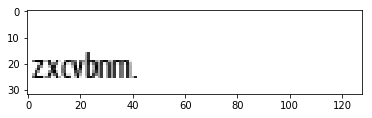

In [0]:
from PIL import Image, ImageDraw, ImageFont

x_path = r'/content/drive/My Drive/Colab Notebooks/course_project/data_crnn/train/x'
img_name = 'image_pil.jpg'

img = Image.new('RGB', (128, 32), color = (255, 255, 255))

fnt = ImageFont.truetype(font_paths['yanone'], 14)
d = ImageDraw.Draw(img)
d.text((2, 12), "zxcvbnm.", font=fnt, fill=(0, 0, 0))

open_cv_image = np.array(img)
# Convert RGB to BGR
open_cv_image = deepcopy(open_cv_image[:, :, ::-1])

plt.imshow(open_cv_image)
plt.show()

